# Premier League Data Preparation

This dataset was downloaded from Kaggle and refers to the 2019-2020 English Football Premier League season.  
The goal is to prepare the data for goal scoring efficiency machine learning modelling.

## Initial data inspection

In [1]:
import pandas as pd

prem_data = pd.read_csv("Premier League Player Stats.csv")
print(prem_data.head())

   Rank                     PLAYER             TEAM  GP  GS   MIN   G  ASST  \
0     1                Jamie Vardy   Leicester City  35  34  3034  23     5   
1     2                 Danny Ings      Southampton  38  32  2812  22     2   
2     3  Pierre-Emerick Aubameyang          Arsenal  36  35  3138  22     3   
3     4  Raheem Shaquille Sterling  Manchester City  33  30  2660  20     1   
4     5        Mohamed Salah Ghaly        Liverpool  34  33  2884  19    10   

   SHOTS  SOG  
0     71   43  
1     66   38  
2     70   42  
3     68   38  
4     95   59  


In [4]:
prem_data.shape

(540, 10)

The data has 540 rows and 10 columns.

In [2]:
prem_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540 entries, 0 to 539
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Rank    540 non-null    int64 
 1   PLAYER  540 non-null    object
 2   TEAM    540 non-null    object
 3   GP      540 non-null    int64 
 4   GS      540 non-null    int64 
 5   MIN     540 non-null    int64 
 6   G       540 non-null    int64 
 7   ASST    540 non-null    int64 
 8   SHOTS   540 non-null    int64 
 9   SOG     540 non-null    int64 
dtypes: int64(8), object(2)
memory usage: 42.3+ KB


The data types look good and there don't appear to be any missing values.

Lets have a look at the summary statistics.

In [6]:
prem_data.describe()

,Rank,GP,GS,MIN,G,ASST,SHOTS,SOG
count,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000
mean,270.500000,18.985185,15.090741,1353.657407,1.825926,1.275926,12.331481,5.909259
std,156.028843,12.847896,12.437641,1091.594162,3.551277,2.129346,16.651935,9.253446
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,135.750000,7.000000,2.000000,241.500000,0.000000,0.000000,0.000000,0.000000
50%,270.500000,20.000000,13.500000,1219.500000,0.000000,0.000000,6.000000,2.000000
75%,405.250000,30.000000,26.000000,2295.500000,2.000000,2.000000,17.000000,7.000000
max,540.000000,38.000000,38.000000,3420.000000,23.000000,20.000000,95.000000,59.000000


All the ranges and values seem to be realistic. For example max minutes 3420/90 = 38 matches. The minimums being zeroes makes sense since there would have been squad players that never played a game. 

## Further inspection

Lets classify the columns. Player is an identifier, team is a categorical grouping and rank looks to have been derived based on goals scored. These columns may not be suitable for machine learning modeling.  
All the other columns are numeric features suitable for machine learning.

Since there were no missing values, no incorrect data types and no impossible values identified, there are no cleaning tasks required at this stage.

## Exploratory data analysis

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

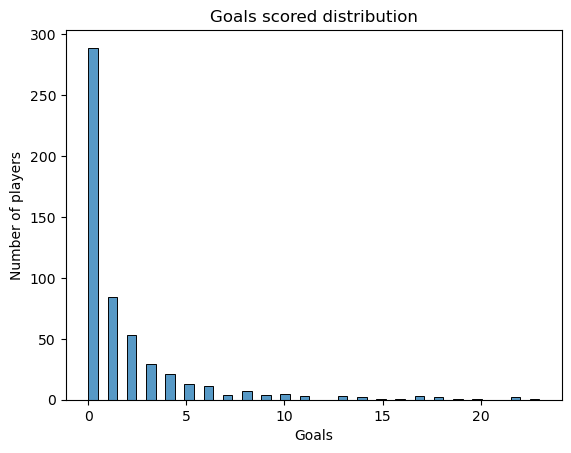

In [10]:
sns.histplot(x="G", data=prem_data)
plt.title("Goals scored distribution")
plt.xlabel("Goals")
plt.ylabel("Number of players")
plt.show()
plt.close()

The most common number of goals scored by far is zero. The plot is right skew with few players having more than 7 goals.

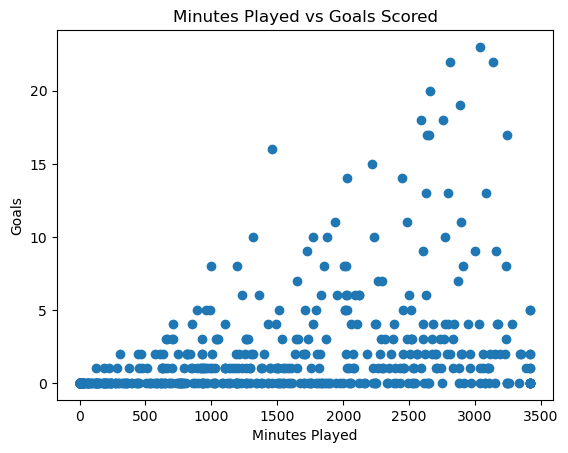

In [11]:
plt.scatter(prem_data["MIN"], prem_data["G"])
plt.title("Minutes Played vs Goals Scored")
plt.xlabel("Minutes Played")
plt.ylabel("Goals")
plt.show()
plt.close()

The scatter plot shows that many players scored zero goals regardless of minutes played. The plot shows a triangular distribution, where the upper bound of goals scored increases as minutes played increases. The lower bound remains at zero across all minutes played.

In [12]:
prem_data["Goal_Contribution"] = prem_data["G"] + prem_data["ASST"]
prem_data["Goal_Contribution"].describe()


count    540.000000
mean       3.101852
std        5.011193
min        0.000000
25%        0.000000
50%        1.000000
75%        4.000000
max       33.000000
Name: Goal_Contribution, dtype: float64

Becuase of the relationship between goals scored and minutes played, it may be useful to create a goal rate (goals per 90 minutes), and other rate columns.

In [13]:
prem_data["Goals_per_90"] = prem_data["G"] / (prem_data["MIN"] / 90)
prem_data["Assists_per_90"] = prem_data["ASST"] / (prem_data["MIN"] / 90)

In [14]:
prem_data[["Goals_per_90", "Assists_per_90"]].describe()

,Goals_per_90,Assists_per_90
count,470.000000,470.000000
mean,0.106768,0.075653
std,0.163534,0.108109
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.035524,0.033458
75%,0.140661,0.113702
max,0.989011,0.643317


In [15]:
prem_data[["Goals_per_90", "Assists_per_90"]].isna().sum()

Goals_per_90      70
Assists_per_90    70
dtype: int64

We can see there are undefined values in the rate columns. This will be due to players who played zero minutes, since the rates will then involve dividing by zero. It would be inappropriate to set these mssing values to zero, so players with zero minutes played should be excluded from rate based analysis. 

In [16]:
prem_data_clean = prem_data[prem_data["MIN"] > 0].copy()
prem_data_clean[["Goals_per_90", "Assists_per_90"]].isna().sum()

Goals_per_90      0
Assists_per_90    0
dtype: int64

Now we will create the final dataset.

In [18]:
prem_data_clean.to_csv("premier_league_efficiency_clean.csv", index=False)